In [ ]:
#importing libraries

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-FHV-services_jan-aug-2015.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Prestige_B01338.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Firstclass_B01536.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Skyline_B00111.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Lyft_B02510.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Dial7_B00887.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Diplo_B01196.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Federal_02216.csv
/kaggle/input/uber-pickups-in-new-york-city/Uber-Jan-Feb-FOIL.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Highclass_B01717.csv
/kaggle/input/uber-pickups-in-ne

In [ ]:
df1 = pd.read_csv("/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv")
df2 = pd.read_csv("/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv")
df3 = pd.read_csv("/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv")
df4 = pd.read_csv("/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv")
df5 = pd.read_csv("/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv")
df6 = pd.read_csv("/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv")

In [ ]:
data_full = pd.concat([df1, df2, df3, df4, df5, df6])

In [ ]:
data_full.shape

(4534327, 4)

In [ ]:
clus = data_full[['Lat', 'Lon']]
clus.dtypes

Lat    float64
Lon    float64
dtype: object

# Plot the number of clusters

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


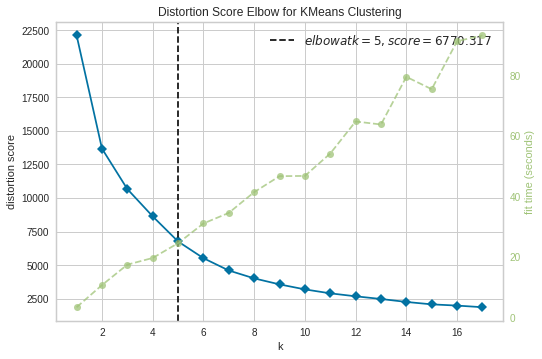

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 18))
visualizer.fit(clus)
visualizer.show()

# Assigning a number of cluster in K-Means Algorithim

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(clus)

KMeans(n_clusters=5, random_state=0)

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[ 40.71600413, -73.98971408],
       [ 40.66573796, -73.76418117],
       [ 40.79662299, -73.87899073],
       [ 40.76235269, -73.97687068],
       [ 40.69504708, -74.20164878]])

In [ ]:
clocation = pd.DataFrame(centroids, columns = ['Latitude', 'Longitude'])

In [ ]:
clocation.head()

,Latitude,Longitude
0,40.716004,-73.989714
1,40.665738,-73.764181
2,40.796623,-73.878991
3,40.762353,-73.976871
4,40.695047,-74.201649


In [ ]:
import folium
centroid = clocation.values.tolist()

map = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)
for point in range(0, len(centroid)):
    folium.Marker(centroid[point], popup = centroid[point]).add_to(map)

map

# Grouping and visualizing the total number of clusters

In [ ]:
label = kmeans.labels_
label

array([3, 0, 0, ..., 2, 0, 0], dtype=int32)

In [ ]:
data_new = data_full.copy()
data_new['Clusters'] = label
data_new

,Date/Time,Lat,Lon,Base,Clusters
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,3
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,3
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,3
...,...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,3
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,4
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,0


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


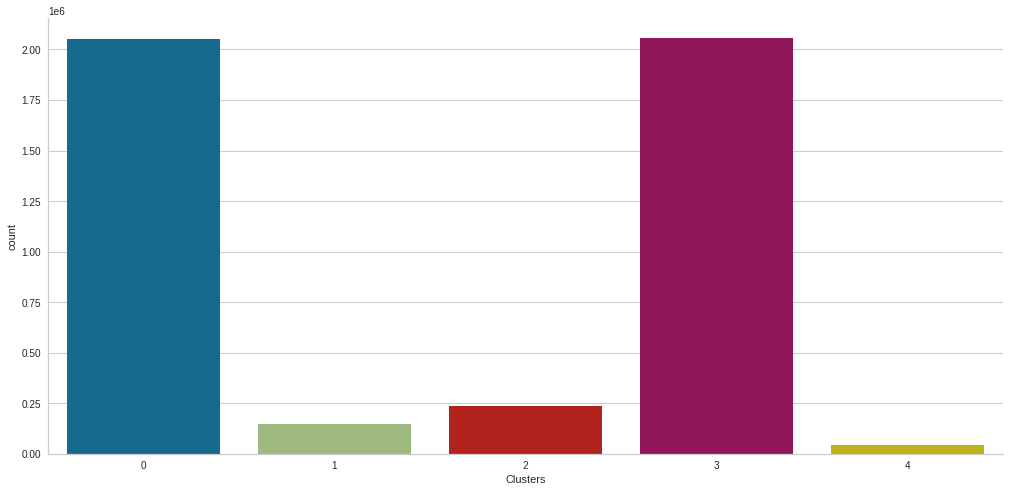

In [ ]:
import seaborn as sb
sb.factorplot(data = data_new, x = "Clusters", kind = "count", size = 7, aspect = 2)

# Compare the cluster

In [ ]:
count_3 = 0
count_0 = 0
for value in data_new['Clusters']:
    if value == 3:
        count_3 += 1
    if value == 0:
        count_0 += 1
print(count_0, count_3)

2052540 2054339


# Predict cluster for new location

In [ ]:
new_location = [(40.86, -75.56)]
kmeans.predict(new_location)

array([4], dtype=int32)